In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'data/BTS_AirTraffic.csv' 
df = pd.read_csv(path)
df.tail()

,YEAR,QUARTER,MONTH,AIRLINE_ID,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,...,AVL_TON_MILES_280,AVL_SEAT_MILES_320,AVL_SEAT_MILES_FIRST,AVL_SEAT_MILES_COACH,REV_ACRFT_MILES_FLOWN_410,REV_ACRFT_MILES_SCH_430,REV_ACRFT_MILES_SCH_COMPLETED,REV_ACRFT_DEP_PERF_510,REV_ACRFT_HRS_AIRBORNE_610,ACRFT_HRS_RAMPTORAMP_630
333074,2024,3,7,22105.0,6F,"FOX AIRCRAFT, LLC",01288,D,6F,"FOX AIRCRAFT, LLC",...,49756.0,470643.0,470643.0,0.0,64983.0,0.0,NaN,936.0,533.0,605.0
333075,2024,3,7,22105.0,6F,"FOX AIRCRAFT, LLC",01288,D,6F,"FOX AIRCRAFT, LLC",...,51138.0,484467.0,484467.0,0.0,67287.0,0.0,NaN,963.0,554.0,628.0
333076,2024,3,7,22119.0,GQQ,Executive Express dba Ravn Connect,01291,D,GQQ,Executive Express dba Ravn Connect,...,51080.0,204318.0,204318.0,0.0,22702.0,0.0,NaN,88.0,96.0,111.0
333077,2024,3,7,22119.0,GQQ,Executive Express dba Ravn Connect,01291,D,GQQ,Executive Express dba Ravn Connect,...,51080.0,204318.0,204318.0,0.0,22702.0,0.0,NaN,88.0,96.0,111.0
333078,2024,3,7,22119.0,GQQ,Executive Express dba Ravn Connect,01291,D,GQQ,Executive Express dba Ravn Connect,...,51080.0,204318.0,204318.0,0.0,22702.0,0.0,NaN,88.0,96.0,111.0


# EDA: Evaluate and Clean Variables

In [150]:
# Only select relevant columns to reduce dataset size
data = df[['YEAR', 'QUARTER', 'MONTH', 'REGION', 'REV_PAX_ENP_110', 'REV_PAX_MILES_140', 'REV_PAX_MILES_COACH',
       'REV_PAX_MILES_FIRST', 'NON_REV_PAX_MILES', 'REV_TON_MILES_240', 'AVL_TON_MILES_280',
       'AVL_SEAT_MILES_320', 'AVL_SEAT_MILES_FIRST', 'AVL_SEAT_MILES_COACH']]

# Map to clearer column names
data.columns = data.columns.map({
    'YEAR': 'Year', 'QUARTER': 'Quarter', 'MONTH': 'Month', 'REGION': 'CarrierRegion',
    'REV_PAX_ENP_110': 'RevPaxEnplaned', 'REV_PAX_MILES_140': 'RevPaxMiles', 'REV_PAX_MILES_COACH': 'RPMCoach', 
    'REV_PAX_MILES_FIRST': 'RPMFirstClass', 'NON_REV_PAX_MILES': 'NonRevPaxMiles', 'REV_TON_MILES_240': 'RevTonMiles',
    'AVL_TON_MILES_280': 'AvailTonMiles', 'AVL_SEAT_MILES_320': 'AvailSeatMiles', 'AVL_SEAT_MILES_FIRST': 'ASMFirstClass',
    'AVL_SEAT_MILES_COACH': 'ASMCoach'})

# Dictionary mapping columns to units
units = {'RevPaxEnplaned': 'passengers', 'RevPaxMiles': 'miles', 'RPMCoach': 'revenue (USD)', 'RPMFirstClass': 'revenue (USD)',
    'NonRevPaxMiles': 'miles', 'RevTonMiles': 'ton-miles', 'AvailTonMiles': 'ton-miles', 'AvailSeatMiles': 'seat-miles',
    'ASMFirstClass': 'seat-miles', 'ASMCoach': 'seat-miles'}

# Map Carrier Region variable to full labels
carrier_region_mapping = {'A': 'Atlantic', 'D': 'Domestic', 'I': 'International', 'L': 'Latin America', 'P': 'Pacific',}
data.loc[:, 'CarrierRegion'] = data['CarrierRegion'].map(carrier_region_mapping)

data.tail()

,Year,Quarter,Month,CarrierRegion,RevPaxEnplaned,RevPaxMiles,RPMCoach,RPMFirstClass,NonRevPaxMiles,RevTonMiles,AvailTonMiles,AvailSeatMiles,ASMFirstClass,ASMCoach
333074,2024,3,7,Domestic,1258.00,101966.00,0.00,101966.00,NaN,10659.00,49756.00,470643.00,470643.00,0.00
333075,2024,3,7,Domestic,1286.00,104198.00,0.00,104198.00,NaN,11242.00,51138.00,484467.00,484467.00,0.00
333076,2024,3,7,Domestic,672.00,173912.00,0.00,173912.00,NaN,18135.00,51080.00,204318.00,204318.00,0.00
333077,2024,3,7,Domestic,672.00,173912.00,0.00,173912.00,NaN,18135.00,51080.00,204318.00,204318.00,0.00
333078,2024,3,7,Domestic,672.00,173912.00,0.00,173912.00,NaN,18135.00,51080.00,204318.00,204318.00,0.00


## Dataset Columns and Descriptions and Initial Ideas for Modeling
Dataset information: https://www.transtats.bts.gov/TableInfo.asp?gnoyr_VQ=FJH&QO_fu146_anzr=Nv4%20Pn44vr4%20f7zzn4B&V0s1_b0yB=D)

### **CarrierRegion**
- **Definition**: The region where the carrier operates (Atlantic, Domestic, International, Latin America, and Pacific).
- **Useful for**: How regional trends (such as geopolitical factors or regional demand shifts) can impact performance. Helps in segmenting the airline’s operations and understanding region-specific revenue or load factors.

### **RevPaxEnplaned**
- **Definition**: The total number of paying passengers who boarded flights. Number of passengers (count)
- **Useful for**: Predicting revenue and occupancy. The higher the number of enplaned passengers, the more likely the airline has high revenue potential. Useful for capacity planning and forecasting.

### **RevPaxMiles**
- **Definition**: The total passenger miles flown (calculated as the number of paying passengers multiplied by the distance flown). Passenger miles (miles)
- **Useful for**: A key metric for assessing airline performance and calculating total revenue. Helps in estimating the distance covered by passengers, which correlates with revenue generation.

### **RPMCoach / RPMFirstClass**
- **Definition**: Revenue from coach/first class passengers (in terms of miles flown). Revenue (USD) per mile
- **Useful for**: Predicting class-specific occupancy and revenue.

### **NonRevPaxMiles**
- **Definition**: Miles flown by non-revenue passengers (e.g., staff, VIPs, or passengers traveling on free or discounted tickets). Passenger miles (miles)
- **Useful for**: Understanding the impact of non-revenue passengers on airline performance. This data is valuable for understanding unused capacity and its effect on load factors and profitability.

### **RevTonMiles**
- **Definition**: Revenue ton-miles, which refers to the total revenue generated by both passengers and cargo (measured in ton-miles). Ton-miles (ton * miles)
- **Useful for**: Assessing cargo-related revenue. Important for airlines that transport freight alongside passengers, as it helps estimate the total payload capacity and revenue generation.

### **AvailTonMiles**
- **Definition**: Available ton-miles, which refers to the total available capacity for both passengers and cargo. Ton-miles (ton * miles)
- **Useful for**: Modeling capacity and load factors. Helps in predicting how much of the available capacity is being utilized, which can affect overall revenue.

### **AvailSeatMiles**
- **Definition**: Available seat-miles, which represents the available seating capacity for passengers on flights. Seat-miles (seats * miles)
- **Useful for**: Evaluating airline capacity and correlating it with revenue or load factor. Helps predict the occupancy rate and how much revenue can be generated from available seats.

### **ASMFirstClass / ASMCoach**
- **Definition**: Available seat-miles for first-class/coach passengers. Seat-miles (seats * miles)
- **Useful for**: Predicting class-specific occupancy and revenue. This metric is particularly useful for airlines that offer premium seating and want to gauge the performance of this section of their flights. Or for low-cost airlines and for those who want to gauge the performance of economy-class seats.

## Missing Values

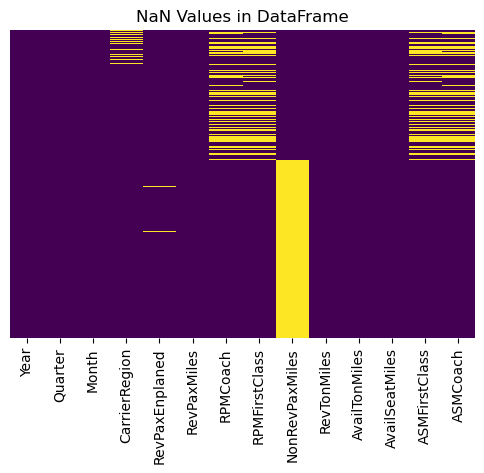

In [126]:
plt.figure(figsize=(6, 4))
sns.heatmap(data.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('NaN Values in DataFrame')
plt.show()

In [127]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values[missing_values > 0])


Missing Values per Column:
CarrierRegion      11657
RevPaxEnplaned      1301
RevPaxMiles          521
RPMCoach           49825
RPMFirstClass      49986
NonRevPaxMiles    191168
RevTonMiles          521
AvailTonMiles        521
AvailSeatMiles       521
ASMFirstClass      49986
ASMCoach           49825
dtype: int64


### Analysis of Missing Values: 
#### It seems that most missing values are due to recording methods in a particular timeframe. Non revenue passenger miles and the class-based data are the only columns which have significant missing values, so missing values overall should not impact this exploration much.  

## Anomalies/Formatting

In [128]:
data.dtypes # Data is in consistant format

Year                int64
Quarter             int64
Month               int64
CarrierRegion      object
RevPaxEnplaned    float64
RevPaxMiles       float64
RPMCoach          float64
RPMFirstClass     float64
NonRevPaxMiles    float64
RevTonMiles       float64
AvailTonMiles     float64
AvailSeatMiles    float64
ASMFirstClass     float64
ASMCoach          float64
dtype: object

In [129]:
data.duplicated().sum()

128926

*** **Uh oh! Duplicated rows for this dataset are no good because we want to ensure each unique flight or route is represented only once per time period to avoid over-inflating the metrics we are analyzing.**

In [151]:
# Remove exact duplicates
data = data.drop_duplicates()
data.reset_index(drop=True, inplace=True)
data.head()

,Year,Quarter,Month,CarrierRegion,RevPaxEnplaned,RevPaxMiles,RPMCoach,RPMFirstClass,NonRevPaxMiles,RevTonMiles,AvailTonMiles,AvailSeatMiles,ASMFirstClass,ASMCoach
0,1974,1,3,NaN,694.00,12000.00,NaN,12000.00,0.00,1223.00,2230.00,20000.00,20000.00,NaN
1,1974,1,3,NaN,1693.00,85000.00,NaN,85000.00,1000.00,14780.00,29818.00,160000.00,160000.00,NaN
2,1974,1,3,NaN,5960.00,548000.00,NaN,548000.00,0.00,60554.00,121513.00,1028000.00,1028000.00,NaN
3,1974,1,3,NaN,21684.00,344000.00,NaN,344000.00,13000.00,34753.00,77998.00,774000.00,774000.00,NaN
4,1974,1,3,NaN,28882.00,559000.00,NaN,559000.00,26000.00,56524.00,125290.00,1253000.00,1253000.00,NaN


## Handling Zero Values

In [152]:
zero_counts = (data == 0).sum()
zero_counts

Year                   0
Quarter                0
Month                  0
CarrierRegion          0
RevPaxEnplaned     53552
RevPaxMiles        54102
RPMCoach          145010
RPMFirstClass      54662
NonRevPaxMiles     67792
RevTonMiles         1593
AvailTonMiles        835
AvailSeatMiles     50349
ASMFirstClass      51029
ASMCoach          145004
dtype: int64

#### Analysis
In this dataset, Revenue variables being zero typically does not make sense, as it would suggest no revenue-generating activity occurred. There are no negative values, so it's hard to tell if this is true or an entry error. This could indicate unusual flight conditions, such as cancellations, delays, or missing data due to errors. While it's possible that zero values could reflect non-operational periods (ex, during maintenance or a strike), this is rare in a monthly dataset.

While these zeros are not equivalent to missing values (NAs), for the purpose of this analysis, I will treat them as missing values. This approach allows us to focus on more meaningful records and avoid skewing the analysis with anomalous or zero-activity entries.

**To proceed with the analysis,** I will treat zero values as NAs and drop these rows. This decision is based on the assumption that zeros in these contexts either represent errors, no data, or rare events that are not useful for this exploration.

### Let's look at some summary statistics

In [153]:
# Summary statistics
pd.set_option('display.float_format', '{:.2f}'.format)
print("\nSummary Statistics:")
print(data.describe().round(2))


Summary Statistics:
           Year   Quarter     Month  RevPaxEnplaned    RevPaxMiles  \
count 204153.00 204153.00 204153.00       203223.00      203874.00   
mean    2000.35      2.49      6.48       299644.90   310538703.67   
std       13.90      1.12      3.45      1088701.37  1067599956.70   
min     1974.00      1.00      1.00            0.00           0.00   
25%     1989.00      1.00      3.00            0.00           0.00   
50%     2002.00      2.00      6.00         3120.00     1689000.00   
75%     2012.00      3.00      9.00        66841.00    69979263.75   
max     2024.00      4.00     12.00     16280414.00 13477073121.00   

           RPMCoach  RPMFirstClass  NonRevPaxMiles   RevTonMiles  \
count     167369.00      167208.00        97510.00     203874.00   
mean    78967177.29   287914498.31      7281532.84   43345674.01   
std    357427695.61  1117162939.14     26581798.55  120469638.89   
min            0.00           0.00            0.00          0.00   
25%     

### Standout Observations from Summary Statistics:

**Year Distribution:**
- The data spans from 1974 to 2024, with the mean year around 2000, indicating a fairly evenly distributed dataset across the years. However, there seems to be a small skew towards more recent years, as evidenced by the higher median year of 2002 and a relatively high 75th percentile of 2012.

**Revenue Passenger Enplaned (RevPaxEnplaned):**
- The mean of 299,644 suggests a large average number of passengers per year, but with a very high standard deviation of over 1 million, indicating significant variability across years.
- The minimum value of 0 suggests there are years or data points with no passengers enplaned, possibly indicating missing or erroneous data.
- The 75th percentile value of 66,841 shows a steep increase in passenger numbers at higher percentiles, signaling a significant difference between lower and upper ends of the distribution.

**Revenue Passenger Miles (RevPaxMiles):**
  - The mean of over 310 million suggests that most flights accrue a significant amount of revenue miles, but the extremely large standard deviation of over 1 billion shows substantial outliers in the data.
  - The 75th percentile is much lower (69 million), suggesting that while some flights contribute very high mileage, most are lower in comparison.
  - The maximum value of over 13 billion miles could point to very long or frequent flights, further emphasizing outliers.

**Revenue Per Mile (RPM) for Coach and First Class:**
  - **First Class:** The mean for first-class RPM is much higher than for coach, with a strong correlation with other variables like `RevPaxEnplaned` and `RevTonMiles`. The data shows a significant concentration of zero values (minimum = 0), which likely represents periods of no first-class traffic. However, there is a steep increase at the 75th percentile (35.3 million), suggesting a few premium routes contributing heavily to first-class RPM.
  - **Coach:** The mean for coach RPM is considerably lower, reflecting the typically lower price of economy tickets. Like first class, there are many zero values, and the 75th percentile value is also lower compared to first class, indicating a less variable distribution.

**Revenue Ton Miles (RevTonMiles):**
  - The large mean of around 43 million and standard deviation of 120 million suggests considerable variation in ton miles across different years and routes.
  - The 75th percentile value of 20.5 million shows that most routes have significantly lower ton miles, with a few outliers contributing to the higher end of the distribution.

**Available Ton Miles (AvailTonMiles) and Available Seat Miles (AvailSeatMiles):**
  - Both `AvailTonMiles` and `AvailSeatMiles` show high means (around 75 million and 431 million respectively) but also exhibit very large standard deviations, indicating significant variation across different years and routes.
  - The minimum values of 0 for both metrics suggest periods with no available seats or ton miles, which could reflect low activity or missing data during certain years.
  - The 75th percentile for `AvailSeatMiles` (104 million) and `AvailTonMiles` (37 million) further reinforce the fact that while most data points are low, there are significant outliers with very high values, especially for larger carriers or regions.

Overall, the data shows a highly skewed distribution with significant outliers, especially in revenue-related columns, highlighting the presence of a few high-traffic routes that dominate the airline industry. The zero values across multiple variables suggest missing or sparse data in certain categories, particularly for first-class flights.

## Regional Analysis - These differences are what I'm interested in modeling. 

In [154]:
# Drop rows where CarrierRegion is NA
data_regions = data.dropna(subset=['CarrierRegion'])

# Drop rows where values are 0 in the specified columns
data_regions = data_regions[(data_regions['RevPaxEnplaned'] != 0) & (data_regions['RevPaxMiles'] != 0) & 
                    (data_regions['RevTonMiles'] != 0) & (data_regions['AvailSeatMiles'] != 0)]

columns_to_plot = ['RevPaxEnplaned', 'RevPaxMiles', 'RevTonMiles', 'AvailSeatMiles'] # I think these will be the most used in this proj
data_regions.reset_index(drop=True, inplace=True)
data_regions = data_regions[['Year', 'Quarter', 'CarrierRegion', 'RevPaxEnplaned', 'RevPaxMiles', 'RevTonMiles', 'AvailSeatMiles']].drop_duplicates()
data_regions.head()

,Year,Quarter,CarrierRegion,RevPaxEnplaned,RevPaxMiles,RevTonMiles,AvailSeatMiles
0,1974,1,Domestic,3102.00,2500000.00,471576.00,5051000.00
2,1974,1,Domestic,649.00,473000.00,58770.00,841000.00
3,1974,1,Domestic,649.00,473000.00,118855.00,841000.00
4,1974,1,Domestic,3751.00,2973000.00,590431.00,5892000.00
5,1974,1,Domestic,698427.00,584049000.00,76725527.00,1177582000.00


### Frequency Distribution

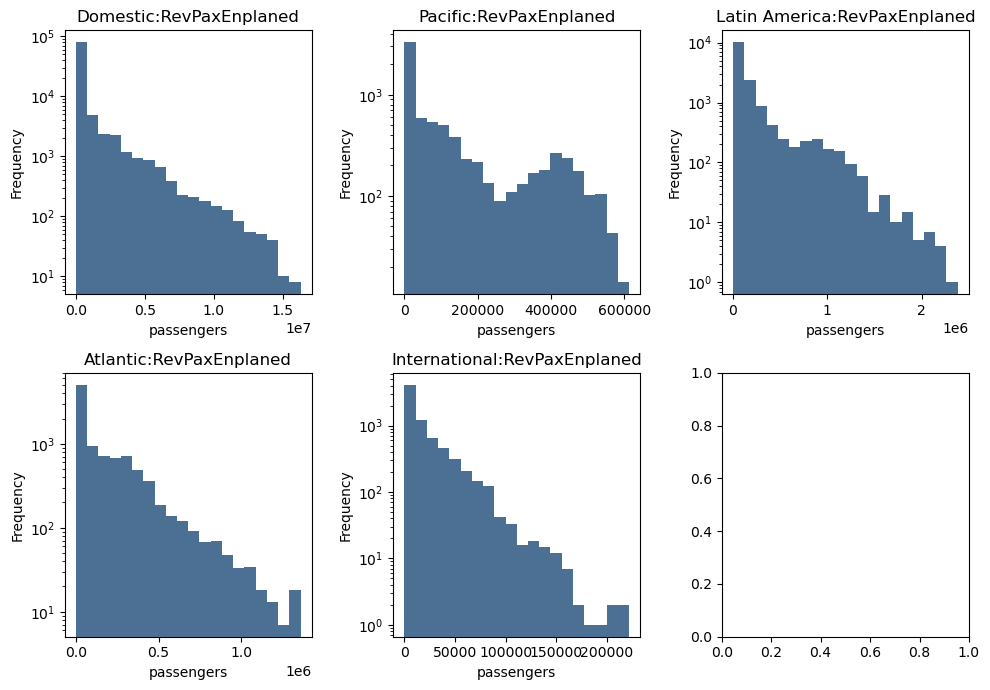

In [134]:
col = 'RevPaxEnplaned' # Change manually to avoid crashing my computer with loops 
                        # ['RevPaxEnplaned', 'RevPaxMiles', 'RevTonMiles', 'AvailSeatMiles']

fig, axes = plt.subplots(2, 3, figsize=(10, 7))
axes = axes.flatten()

for i, region in enumerate(data_regions["CarrierRegion"].unique()):
    region_data = data_regions[data_regions['CarrierRegion'] == region]
    region_data_clean = region_data[[col]].dropna()

    axes[i].hist(region_data_clean[col], bins=20, color='#003366', alpha=0.7)
    axes[i].set_title(f'{region}:{col}')
    axes[i].set_xlabel(units[col])
    axes[i].set_ylabel('Frequency')
    axes[i].set_yscale('log')

plt.tight_layout()
plt.show()

### Biggest Observations:

#### All modes are close to zero.
#### All distributions have negative skew from mode 0.

The distributions suggests that while most flights or routes are low-revenue, there are a few exceptional cases with significantly higher values. This kind of distribution is typical in many industries, especially in sectors like airlines, where a small number of high-revenue flights or routes account for a large portion of the total revenue. This pattern highlights the potential for outliers—specifically large, high-revenue flights or international routes—to heavily influence overall statistics. It also raises the possibility that the industry is somewhat fragmented, with a mix of small regional carriers and larger, more established ones. The presence of zero values could indicate either a lack of activity or very low revenues on certain routes or during specific periods, which could be influenced by factors such as seasonal demand, route popularity, or economic conditions. Therefore, it's important to approach data analysis with the understanding that these outliers, while informative, should not overshadow the majority of low-revenue flights.

# Step 3 Evaluate Associations and Structure

### Let's start with looking at annual trends

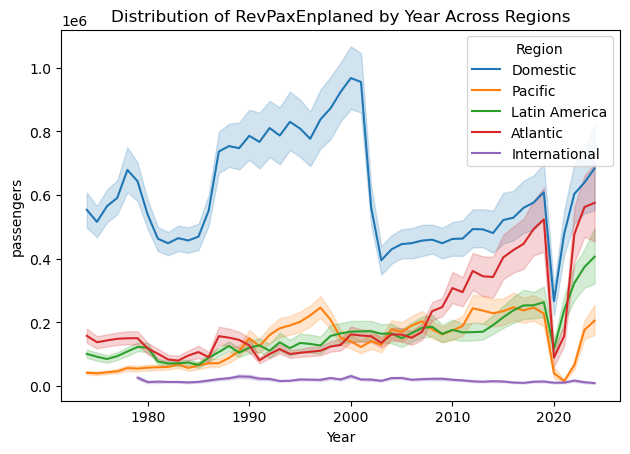

In [155]:
col = 'RevPaxEnplaned'  # Change manually to avoid crashing my computer with loops
                        # ['RevPaxEnplaned', 'RevPaxMiles', 'RevTonMiles', 'AvailSeatMiles']

for region in data_regions["CarrierRegion"].unique():
    region_data = data_regions[data_regions['CarrierRegion'] == region]
    region_data_clean = region_data[['Year', col]].dropna()

    sns.lineplot(data=region_data_clean, x='Year', y=col, label=region)

plt.title(f'Distribution of {col} by Year Across Regions')
plt.xlabel('Year')
plt.ylabel(units[col])
plt.legend(title='Region')

plt.tight_layout()
plt.show()

### Big Observations:

#### Dip At COVID:
A significant dip can be observed in the data around 2020, coinciding with the global COVID-19 pandemic. This drop in activity reflects the impact of travel restrictions, lockdowns, and reduced demand for flights during that time.

#### RevPaxEnplaned:
- **Domestic flights** significantly outnumber all other regions over the entire 50-year period, indicating a dominance of domestic air travel in terms of passenger enplanement.
- **International flights** remain near zero for the majority of the timeline, with very low enplaned passenger counts compared to domestic and regional flights. This could be due to fewer international airlines or more limited international routes compared to domestic services.

#### Revenue Passenger Miles:
- There is a noticeable **increase in Atlantic miles after 2000**, which overtakes all other regions, becoming the most active. This aligns with global economic shifts, increased air travel, and the growth of the transatlantic market. 
- **Pacific flights** follow the Atlantic but are a distant second in terms of revenue passenger miles.
- **International** remains near zero for most of the period, highlighting that international flights, while increasing in recent years, are still a minor part of total air travel.

#### Revenue Ton Miles:
- A **rapid increase after 2000** in **Pacific and Atlantic flights**, particularly in terms of revenue ton miles, almost quadruples the other regions. This could be attributed to the rise in cargo transportation and the demand for international trade, especially with the Pacific region becoming a major hub for global trade and aviation.
- **International flights** also see a large increase after 2000, although still relatively small compared to Pacific and Atlantic. This suggests a growth in long-haul flights but at a slower pace than the other regions.

#### Available Seat Miles:
- A **similar increase in Pacific and Atlantic regions after 2000**, though the growth is slightly less pronounced than in the previous categories. This reflects the growing demand for air travel, but potentially also a more balanced increase in capacity to match demand.
- **International flights** remain near zero for most of the timeline, indicating limited available seat capacity for international flights in comparison to domestic and regional services.

### Additional Insights:
- **COVID impact**: The sharp decline in data points around 2020 reinforces the dramatic effects of the pandemic on global air travel. The contrast between pre- and post-pandemic trends highlights the volatility in the airline industry, especially in terms of passenger enplanements and available seat miles.
- **Regional Dominance**: Domestic flights consistently outperform international flights, suggesting that the majority of air travel is focused within national borders, with international air travel being a smaller segment overall, even as global connectivity continues to grow.

## Next, All Variable Correlation Analysis

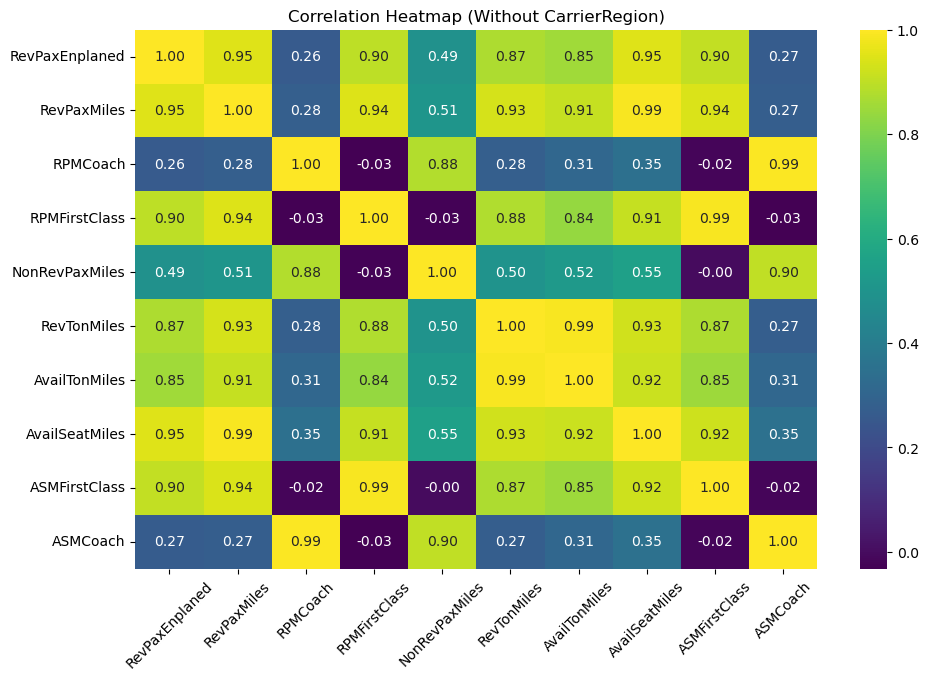

In [21]:
# Dropping Categorical Columns
data_corr = data.drop(columns=['CarrierRegion', 'Year', 'Quarter', 'Month'])

plt.figure(figsize=(11, 7))
corr_matrix = data_corr.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.xticks(rotation=45)
plt.title('Correlation Heatmap (Without CarrierRegion)')
plt.show()

## Things to Note:

### Difference between Coach and First Class:
**First Class** shows much higher correlations with the other columns than Coach does. For example, *Revenue Per Mile First Class* has correlations greater than 0.8 with variables such as *RevPaxEnplaned*, *RevPaxMiles*, *RevTonMiles*, *AvailTonMiles*, and *AvailSeatMiles*. This suggests that the performance of first-class services is closely tied to overall airline operations and is more aligned with key performance metrics.

**Coach** has correlations of less than 0.35 with the same set of variables, indicating that coach services operate more independently and are less closely linked with the overall revenue and capacity trends of the airline.

### Lack of 0.3-0.5 or 0.5-0.7 correlation range:
- The absence of correlations in the **0.3-0.5** and **0.5-0.7** ranges is notable and suggests that the dataset is **highly interrelated**. This could indicate that the variables are strongly related to each other or that they are all influenced by common external factors (e.g., overall demand, airline strategy, fuel prices, etc.).
- This lack of mid-range correlations may also suggest a need for **dimensionality reduction** or more advanced analysis to uncover hidden relationships within the dataset.


## So, Let's try PCA

In [156]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_for_pca = data[['RevPaxEnplaned', 'RevPaxMiles', 'RevTonMiles', 'AvailTonMiles', 'AvailSeatMiles']]
data_for_pca_clean = data_for_pca.dropna()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca_clean)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

print(f"PC1 Explains {round(pca.explained_variance_ratio_[0] * 100, 2)}% of the data's variance")

PC1 Explains 94.32% of the data's variance


### Ok... so no dimensionality reduction needed because PCA only needed one PC to explain almost all the data.

# Part 4 Overall Initial Impressions from Exploratory Data Analysis

## **Year Distribution and Trend**:
- The dataset spans from 1974 to 2024 with a mean year around 2000, indicating a fairly balanced distribution across the years. However, there is a slight skew towards more recent years, evidenced by the higher median year of 2002 and the 75th percentile of 2012.

## **Regional Insights**:
### **Domestic vs. International Flights**:
- **Domestic flights** dominate passenger enplanement and available seat miles across the 50-year period.
- **International flights** remain near zero for most of the dataset, with increasing enplanements and miles in recent years, particularly in the **Atlantic** and **Pacific** regions.

### **Trends After 2000**:
- There is a noticeable increase in **Atlantic revenue passenger miles** and **Pacific revenue ton miles** after 2000, aligning with global economic shifts and growing international trade.
- **International flights** show growth after 2000 but still remain smaller compared to the Pacific and Atlantic regions.

## **Impact of COVID-19**:
- A significant dip in the data around **2020** clearly reflects the global **COVID-19 pandemic**'s impact, particularly with reduced passenger enplanements and available seat miles. This highlights the volatility of the airline industry due to global events.

## **Additional Insights**:
### **Correlations between Variables**:
- **First Class** shows higher correlations with other metrics (e.g., RevPaxEnplaned, RevTonMiles), suggesting it is closely linked to overall airline performance.
- **Coach** services are less correlated with other metrics, indicating that Coach services operate more independently.
- The absence of correlations in the **0.3-0.5** and **0.5-0.7** range suggests that the dataset is highly interrelated and could benefit from advanced analysis to uncover hidden relationships.

### **Dimensionality Reduction**:
- **PCA** (Principal Component Analysis) shows that only one principal component is needed to explain most of the variance in the dataset, suggesting that dimensionality reduction is not necessary.

## **Next Steps**: Predictive Modeling to Determine the Best Time to Travel

Based on the insights gained from the exploratory data analysis, the next step will be to build a predictive model aimed at determining the **best time to travel** to a specific region. For the purposes of this model, we will define the "best time" based on **lowest prices** and **high availability**, two key factors that influence travel decisions.

#### Approach:
1. **Feature Engineering**:
     - **Off-Season/On-Season**: Year/Month/Quarter will capture seasonal trends.
     - **Passenger Enplanement and Available Seat Miles**: These features will help assess **availability** of flights.
     - **Price Trends**: Although we don't have explicit price data, we can use metrics like `RevPaxEnplaned` (passenger enplanements) and `AvailSeatMiles` (available seat miles) to indirectly estimate periods of lower congestion or higher availability.

   
2. **Target Variable**:
   - The target will be to predict whether a given period (month/year) is considered the **"best time to travel"** based on:
     - **Low price per seat**: A period with fewer passengers (e.g., below the 25th percentile of enplanements).

3. **Modeling Approach**:
   - A **ridge regression model** to account for the multicollinearity in the dataset and incoorporate regularization to prevent overfitting. 
   
By leveraging the existing airline dataset and focusing on availability and low passenger load, this model can offer valuable insights into the optimal times to travel, which can be beneficial for travelers, airlines, and tourism businesses looking to optimize their operations.

# Inference

### Step 1: Hypothesis Development

#### Research Question: Can we accurately predict which month will have the cheapest price per airline seat for each region?

**Hypothesis**: Off-seasons (e.g., winter) have significantly lower PricePerSeat values compared to peak seasons (e.g., summer) across all regions.

### Analysis: Feature Engineering

In [183]:
# Group data by season (Winter, Spring, Summer, Fall) and carrier region (Domestic, Atlantic, Pacific, etc.)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data_cleaned = data.dropna().copy()
data_cleaned = data_cleaned.drop_duplicates()

data_cleaned['Season'] = data_cleaned['Month'].apply(get_season)
data_cleaned.head()

,Year,Quarter,Month,CarrierRegion,RevPaxEnplaned,RevPaxMiles,RPMCoach,RPMFirstClass,NonRevPaxMiles,RevTonMiles,AvailTonMiles,AvailSeatMiles,ASMFirstClass,ASMCoach,Season
65,1974,1,3,Domestic,3102.00,2500000.00,0.00,2500000.00,53000.00,471576.00,672306.00,5051000.00,5051000.00,0.00,Spring
69,1974,1,3,Domestic,3751.00,2973000.00,0.00,2500000.00,53000.00,590431.00,892851.00,5892000.00,5051000.00,0.00,Spring
70,1974,1,3,Domestic,698427.00,584049000.00,525751000.00,58298000.00,25112000.00,76725527.00,181413924.00,1177582000.00,203414000.00,974168000.00,Spring
71,1974,1,3,Domestic,0.00,0.00,0.00,0.00,0.00,5608375.00,9384605.00,0.00,0.00,0.00,Spring
72,1974,1,3,Domestic,698427.00,584049000.00,525751000.00,58298000.00,25112000.00,82333902.00,190798529.00,1177582000.00,203414000.00,974168000.00,Spring


## Explanation of Feature Engineering Choices

### 1. **Creating New Features**
### `PricePerSeat`
- **Formula:** `data_cleaned['RevPaxMiles'] / data_cleaned['AvailSeatMiles']`
- **Logic:** This derived metric estimates the average revenue per available seat mile (RASM), serving as a proxy for ticket prices. It normalizes revenue by seat availability to account for varying flight capacities, making it a more standardized measure for comparisons.

### `LoadFactor`
- **Formula:** `data_cleaned['RevPaxEnplaned'] / data_cleaned['AvailSeatMiles']`
- **Logic:** Load factor is a critical airline industry metric that indicates the percentage of available seat miles utilized by paying passengers. It provides insights into demand and efficiency, directly impacting revenue.

### 2. **Handling Outliers**
- Outliers in `PricePerSeat` represent anomalies like private flights or unusually high-priced tickets, which skew the data distribution and could bias the analysis.
- **Steps Taken:**
  - Calculate the **Interquartile Range (IQR):** This measures the spread of the middle 50% of the data.
  - Define **lower and upper bounds:** These bounds are set as 1.5 times the IQR below the 25th percentile (`Q1`) and above the 75th percentile (`Q3`), a standard method for identifying outliers.
  - Filter out data points outside these bounds.

### 3. **Removing Zero Values**
- **Reason:** A `PricePerSeat` of zero is not feasible since seats cannot be free. Rows with zero values likely indicate erroneous data or missing pricing information and are removed for accuracy.


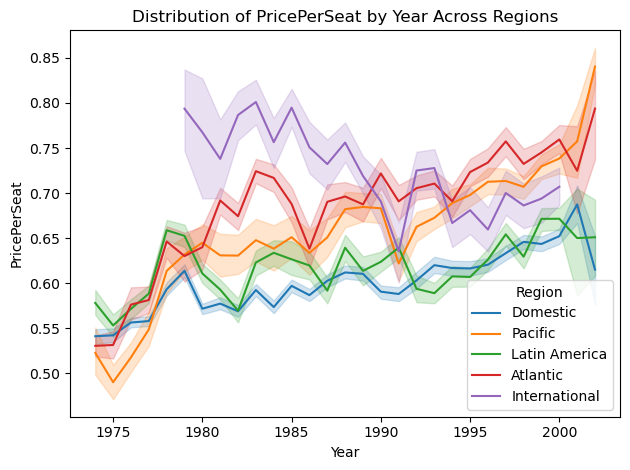

In [184]:
# Feature Engineering
data_cleaned['PricePerSeat'] = data_cleaned['RevPaxMiles'] / (data_cleaned['AvailSeatMiles'])
data_cleaned['LoadFactor'] = data_cleaned['RevPaxEnplaned'] / (data_cleaned['AvailSeatMiles'])
data_cleaned['PricePerSeat'] = data_cleaned['PricePerSeat']
data_cleaned['LoadFactor'] = data_cleaned['LoadFactor']
data_cleaned.head()

# Remove outliers that represent private flights or extremely expensive tickets that are skewing the distribution. 
# Calculate the Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data_cleaned['PricePerSeat'].quantile(0.25)
Q3 = data_cleaned['PricePerSeat'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_cleaned = data_cleaned[(data_cleaned['PricePerSeat'] >= lower_bound) & (data_cleaned['PricePerSeat'] <= upper_bound)]
# Drop zeros because seats can't be free.
data_cleaned = data_cleaned[data_cleaned['PricePerSeat'] != 0]

col = 'PricePerSeat'

for region in data_cleaned["CarrierRegion"].unique():
    region_data = data_cleaned[data_cleaned['CarrierRegion'] == region]
    region_data_clean = region_data[['Year', col]].dropna()

    sns.lineplot(data=region_data_clean, x='Year', y=col, label=region)

plt.title(f'Distribution of {col} by Year Across Regions')
plt.xlabel('Year')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

## Step 2: T Test to see if the regions are statistically different

In [185]:
from scipy.stats import ttest_ind

# Prepare regional data for t-tests
regional_data_price = {
    'Domestic': data_cleaned[data_cleaned['CarrierRegion'] == 'Domestic']['PricePerSeat'].dropna(),
    'Pacific': data_cleaned[data_cleaned['CarrierRegion'] == 'Pacific']['PricePerSeat'].dropna(),
    'Latin America': data_cleaned[data_cleaned['CarrierRegion'] == 'Latin America']['PricePerSeat'].dropna(),
    'Atlantic': data_cleaned[data_cleaned['CarrierRegion'] == 'Atlantic']['PricePerSeat'].dropna(),
    'International': data_cleaned[data_cleaned['CarrierRegion'] == 'International']['PricePerSeat'].dropna()
}

# Perform pairwise t-tests between regions and output results
for region1 in regional_data_price.keys():
    for region2 in list(regional_data_price.keys()):
        if region1 != region2:
            t_stat, p_val = ttest_ind(regional_data_price[region1], regional_data_price[region2], equal_var=False)
            print(f"T-test between {region1} and {region2}: t-statistic = {t_stat:.4f}, p-value = {p_val:.4g}")

T-test between Domestic and Pacific: t-statistic = -22.5290, p-value = 3.599e-106
T-test between Domestic and Latin America: t-statistic = -10.5576, p-value = 6.82e-26
T-test between Domestic and Atlantic: t-statistic = -44.1803, p-value = 0
T-test between Domestic and International: t-statistic = -38.3659, p-value = 6.351e-259
T-test between Pacific and Domestic: t-statistic = 22.5290, p-value = 3.599e-106
T-test between Pacific and Latin America: t-statistic = 13.7592, p-value = 2.061e-42
T-test between Pacific and Atlantic: t-statistic = -13.4234, p-value = 1.38e-40
T-test between Pacific and International: t-statistic = -18.3777, p-value = 6.861e-73
T-test between Latin America and Domestic: t-statistic = 10.5576, p-value = 6.82e-26
T-test between Latin America and Pacific: t-statistic = -13.7592, p-value = 2.061e-42
T-test between Latin America and Atlantic: t-statistic = -31.6144, p-value = 8.214e-207
T-test between Latin America and International: t-statistic = -31.1420, p-value

### Yes, they are! Because all the p values are < 0.05

## Evaluate Assumptions
### Ridge Regression Assumptions:

**Multicollinearity:** Ensure minimal multicollinearity among predictors by reviewing correlation matrices or VIF values.

**Residual Analysis:** Check residual plots for patterns, which may indicate non-linearity or heteroscedasticity.

# Prediction

## Step 1: Decide on a variable you'd like to model
We will be modelling our feature engineered variable `PricePerSeat` and using various predictor combinations to optimize r^2 with Ridge Regression.

## Step 2: Ridge Regression:
We will use **Ridge Regression** to assess the relationship between seasons, regions, and PricePerSeat. Interpret coefficients for each season and region to quantify their influence on pricing.

**Ridge Regression** is good for this data because it handles multicollinearity. This data is highly intercorrelated as seen by the correlation heat map in the EDA. Additionally, ridge regression's regularization term ensures the model remains interpretable without overfitting.

### Visualization for Comparison:
Boxplots of PricePerSeat by season to visualize price distribution.
Regional breakdowns of seasonal prices using faceted plots.

## Step 3: Fit the model

In [186]:
domestic_data = data_cleaned[data_cleaned['CarrierRegion'] == 'Domestic']
pacific_data = data_cleaned[data_cleaned['CarrierRegion'] == 'Pacific']
latin_america_data = data_cleaned[data_cleaned['CarrierRegion'] == 'Latin America']
atlantic_data = data_cleaned[data_cleaned['CarrierRegion'] == 'Atlantic']
international_data = data_cleaned[data_cleaned['CarrierRegion'] == 'International']

regional_data = {
    'Domestic': domestic_data,
    'Pacific': pacific_data,
    'Latin America': latin_america_data,
    'Atlantic': atlantic_data,
    'International': international_data}

In [187]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Define predictors and target
domestic_predictors = ['Year', 'Month', 'Season', 'LoadFactor', 'RevPaxEnplaned', 'RevPaxMiles', 'RPMFirstClass', 'AvailSeatMiles']
pacific_predictors = ['Year', 'Month', 'Season', 'LoadFactor', 'RevPaxEnplaned', 'RevPaxMiles', 'RPMFirstClass', 'RevTonMiles', 'AvailTonMiles']
latin_america_predictors = ['Year', 'Month', 'Season', 'LoadFactor', 'RevPaxEnplaned', 'RevPaxMiles', 'RPMFirstClass', 'AvailSeatMiles', 'ASMFirstClass']
atlantic_predictors = ['Year', 'Month', 'Season', 'LoadFactor', 'RevPaxEnplaned', 'RevPaxMiles', 'RPMFirstClass', 'AvailSeatMiles', 'NonRevPaxMiles']
international_predictors = ['Year', 'Month', 'Season', 'LoadFactor', 'RevPaxEnplaned', 'RevPaxMiles', 'RPMFirstClass', 'AvailSeatMiles']

target = 'PricePerSeat'

def ridge_regression(key, df, predictors):
    X = df[predictors].copy()
    y = df[target].copy()

    # Drop rows with NaN values first
    df_clean = pd.concat([X, y], axis=1).dropna()
    X_clean = df_clean[predictors]
    y_clean = df_clean[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

    # One-hot encode categorical variables
    X_train = pd.get_dummies(X_train, drop_first=True)
    X_test = pd.get_dummies(X_test, drop_first=True)

    # Standardize predictors
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Search for the best alpha using cross-validation
    alphas = np.logspace(-5, 5, 100)
    r2_scores = []

    for alpha in alphas:
        model = Ridge(alpha=alpha)
        model.fit(X_train_scaled, y_train)
        score = model.score(X_test_scaled, y_test)
        r2_scores.append(score)

    # Find the best alpha
    best_alpha = alphas[np.argmax(r2_scores)]
    best_r2 = max(r2_scores)

    # Train final model with the best alpha
    final_model = Ridge(alpha=best_alpha)
    final_model.fit(X_train_scaled, y_train)

    return best_r2, best_alpha, final_model, X_train_scaled, y_train, X_test_scaled, y_test

# Run Ridge Regression for each region and capture results
domestic_r2, domestic_alpha, domestic_model, domestic_X_train, domestic_y_train, domestic_X_test, domestic_y_test = ridge_regression('Domestic', domestic_data, domestic_predictors)
pacific_r2, pacific_alpha, pacific_model, pacific_X_train, pacific_y_train, pacific_X_test, pacific_y_test = ridge_regression('Pacific', pacific_data, pacific_predictors)
latin_america_r2, latin_america_alpha, latin_america_model, latin_X_train, latin_y_train, latin_X_test, latin_y_test = ridge_regression('Latin America', latin_america_data, latin_america_predictors)
atlantic_r2, atlantic_alpha, atlantic_model, atlantic_X_train, atlantic_y_train, atlantic_X_test, atlantic_y_test = ridge_regression('Atlantic', atlantic_data, atlantic_predictors)
international_r2, international_alpha, international_model, international_X_train, international_y_train, international_X_test, international_y_test = ridge_regression('International', international_data, international_predictors)

# Print R^2 and alpha for each region
print(f"Domestic: Best alpha = {domestic_alpha:.5f} with R^2 = {domestic_r2:.5f}")
print(f"Pacific: Best alpha = {pacific_alpha:.5f} with R^2 = {pacific_r2:.5f}")
print(f"Latin America: Best alpha = {latin_america_alpha:.5f} with R^2 = {latin_america_r2:.5f}")
print(f"Atlantic: Best alpha = {atlantic_alpha:.5f} with R^2 = {atlantic_r2:.5f}")
print(f"International: Best alpha = {international_alpha:.5f} with R^2 = {international_r2:.5f}")

Domestic: Best alpha = 0.00001 with R^2 = 0.17434
Pacific: Best alpha = 1.12332 with R^2 = 0.57790
Latin America: Best alpha = 2.84804 with R^2 = 0.43530
Atlantic: Best alpha = 0.00001 with R^2 = 0.50775
International: Best alpha = 0.00001 with R^2 = 0.29458


## Step 4: Avaluate Model

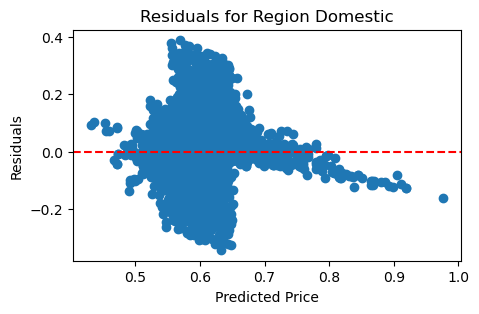

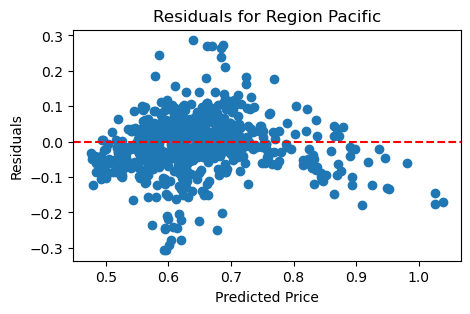

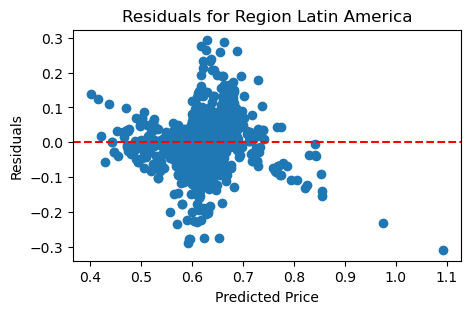

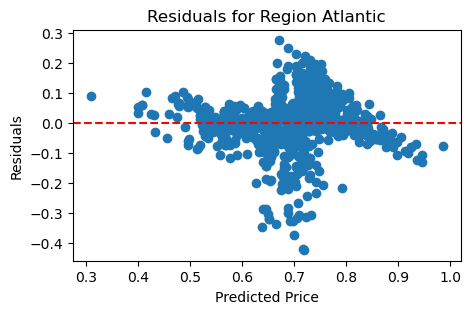

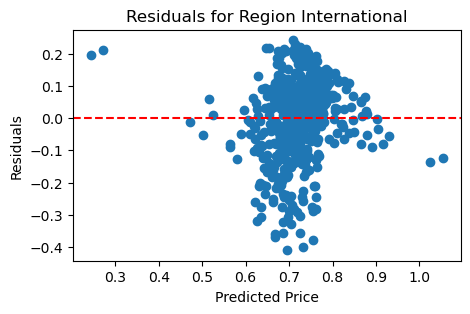

Domestic: MSE = 0.01179, RMSE = 0.10858
Pacific: MSE = 0.00638, RMSE = 0.07989
Latin America: MSE = 0.00537, RMSE = 0.07329
Atlantic: MSE = 0.00790, RMSE = 0.08887
International: MSE = 0.01608, RMSE = 0.12680


In [188]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def test_model(key, best_alpha, X_train, X_test, y_train, y_test):
    # Train the final model with the best alpha on training data
    final_model = Ridge(alpha=best_alpha)
    final_model.fit(X_train, y_train)

    # Predict on test data
    y_pred = final_model.predict(X_test)

    # Calculate residuals
    residuals = y_test - y_pred

    # Plot residuals
    plt.figure(figsize=(5, 3))
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residuals for Region {key}')
    plt.xlabel('Predicted Price')
    plt.ylabel('Residuals')
    plt.show()

    # Evaluate Mean Squared Error and RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return final_model, mse, rmse

# Test the model for each region and capture results
domestic_model, domestic_mse, domestic_rmse = test_model('Domestic', domestic_alpha, domestic_X_train, domestic_X_test, domestic_y_train, domestic_y_test)
pacific_model, pacific_mse, pacific_rmse = test_model('Pacific', pacific_alpha, pacific_X_train, pacific_X_test, pacific_y_train, pacific_y_test)
latin_america_model, latin_america_mse, latin_america_rmse = test_model('Latin America', latin_america_alpha, latin_X_train, latin_X_test, latin_y_train, latin_y_test)
atlantic_model, atlantic_mse, atlantic_rmse = test_model('Atlantic', atlantic_alpha, atlantic_X_train, atlantic_X_test, atlantic_y_train, atlantic_y_test)
international_model, international_mse, international_rmse = test_model('International', international_alpha, international_X_train, international_X_test, international_y_train, international_y_test)

# Print results for each region
print(f'Domestic: MSE = {domestic_mse:.5f}, RMSE = {domestic_rmse:.5f}')
print(f'Pacific: MSE = {pacific_mse:.5f}, RMSE = {pacific_rmse:.5f}')
print(f'Latin America: MSE = {latin_america_mse:.5f}, RMSE = {latin_america_rmse:.5f}')
print(f'Atlantic: MSE = {atlantic_mse:.5f}, RMSE = {atlantic_rmse:.5f}')
print(f'International: MSE = {international_mse:.5f}, RMSE = {international_rmse:.5f}')

# Step 5 Analysis of Ridge Regression Results by Region ("Utility")

Overall, I am happy with these error results! The largest RMSE (International model) of 0.1268 suggests that, on average, the predicted International price per seat deviates by about 12 cents from the actual prices. Pacific and Latin America are even smaller margins. This result indicates that air traffic data can predict future prices. 

The Latin America region demonstrates the lowest MSE and RMSE among all regions. This indicates a strong performance of the ridge regression model, with predictions closely aligned with actual prices. The smaller error values suggest that the model captures the underlying patterns effectively.

In [189]:
# Define a function to create a DataFrame for upcoming years with predictors
def create_future_data(start_year=2024, num_years=5):
    data = []
    for year in range(start_year, start_year + num_years):
        for month in range(1, 13):
            # Determine season
            if month in [12, 1, 2]:
                season = 'Winter'
            elif month in [3, 4, 5]:
                season = 'Spring'
            elif month in [6, 7, 8]:
                season = 'Summer'
            else:
                season = 'Fall'

            # Sample placeholder values for predictors
            load_factor = np.random.rand()  # Random placeholder
            rev_pax_enplaned = np.random.rand() * 10
            rev_pax_miles = np.random.rand() * 5
            rpm_first_class = np.random.rand() * 2
            avail_seat_miles = np.random.rand() * 100
            asm_first_class = np.random.rand() * 3
            rev_ton_miles = np.random.rand() * 42
            avail_ton_miles = np.random.rand() * 21
            asm_first_class = np.random.rand() * 68
            non_rev = np.random.rand() * 6

            # For Pacific and Atlantic regions, include unique predictors
            row = {
                'Year': year,
                'Month': month,
                'Season': season,
                'LoadFactor': load_factor,
                'RevPaxEnplaned': rev_pax_enplaned,
                'RevPaxMiles': rev_pax_miles,
                'RPMFirstClass': rpm_first_class,
                'AvailSeatMiles': avail_seat_miles,
                'RevTonMiles': rev_ton_miles,
                'AvailTonMiles': avail_ton_miles,
                'ASMFirstClass': asm_first_class,
                'NonRevPaxMiles': non_rev
            }

            # Adding region-specific predictors
            data.append(row)

    df_future = pd.DataFrame(data)
    return df_future

df_future = create_future_data(2024, 5)

In [190]:
def predict_seats_ridge(models_predictors, df):
    predictions = {}

    for region, (model, region_predictors) in models_predictors.items():
        df_region = df[region_predictors].copy()

        # Drop rows with NaN values first
        df_clean = df_region.dropna()

        # One-hot encode categorical variables
        df_encoded = pd.get_dummies(df_clean, drop_first=True)

        # Standardize predictors
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(df_encoded)

        # Predict seat prices
        predictions[region] = model.predict(X_scaled)

    return predictions

# Define models and corresponding predictors
models_predictors = {
    'Domestic': (domestic_model, domestic_predictors),
    'Pacific': (pacific_model, pacific_predictors),
    'Latin America': (latin_america_model, latin_america_predictors),
    'Atlantic': (atlantic_model, atlantic_predictors),
    'International': (international_model, international_predictors)
}

forecast_values = predict_seats_ridge(models_predictors, df_future)

### Interpreting Our Results

Each value in the 'forecast_values' array represents a predicted normalized seat price for a specific observation (e.g., a unique combination of time, flight, or season).

The values are normalized or standardized so they don't represent the actual price, but rather a higher-than-average (if positive) or lower-than-average (if negative) price. So, **the best month to travel would be the month where the target forecast is minimized** (is least than the average).

In [191]:
# Function to get the top 3 cheapest values with their indices for each region
def top_3_cheapest(region_data):
    sorted_indices = np.argsort(region_data)
    return [(region_data[i], i) for i in sorted_indices[:3]]

# Print the top 3 cheapest month-year combinations along with their indices for each region
for region, prices in forecast_values.items():
    top_prices = top_3_cheapest(prices)
    print(f"{region}:")
    for price, idx in top_prices:
        print(f"  Index {idx}: Price {price}")

Domestic:
  Index 41: Price -0.15349586253512992
  Index 42: Price -0.1011140020125707
  Index 45: Price -0.07109826086839244
Pacific:
  Index 28: Price -0.6736812583830567
  Index 55: Price -0.45562931182115274
  Index 4: Price -0.44808384148282543
Latin America:
  Index 39: Price -0.5372545861378865
  Index 41: Price -0.43463710843642966
  Index 45: Price -0.395275282403993
Atlantic:
  Index 41: Price -0.21107140965455173
  Index 39: Price -0.18683050632687115
  Index 45: Price -0.18046412356930408
International:
  Index 41: Price -0.1665789138486672
  Index 45: Price -0.1508869912479247
  Index 42: Price -0.14066549066732714


### According to our ridge regression model that predicts PricePerSeat, the best months to travel to the following regions are:

#### Domestic
42, 43, and 46 months after the end date of the data (which is September 2002)

#### Pacific 
29, 56, and 5 months after the end date of the data (which is September 2002)

#### Latin America
40, 42, and 46 months after the end date of the data (which is September 2002)

#### Atlantic 
42, 40, and 46 months after the end date of the data (which is September 2002)

#### International
42, 46, and 43 months after the end date of the data (which is September 2000)